In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EXTRACT: 

In [70]:
# Import the data

csv_file = 'nyc_311_service_requests.csv'
df = pd.read_csv(csv_file, low_memory=False)
df.sample(10).sort_index()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
19754,65457746,2025-07-04T23:52:30.000,2025-07-05T01:20:26.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11207.0,536 GLENMORE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674003,-73.890450,"\n, \n(40.67400337989072, -73.8904498259784)"
27610,65469187,2025-07-04T11:33:09.000,2025-07-05T22:12:23.000,DSNY,Department of Sanitation,Illegal Dumping,Removal Request,Sidewalk,11233.0,1 JARDINE PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677047,-73.905140,"\n, \n(40.67704666250302, -73.90513967598085)"
39189,65441391,2025-07-02T23:44:45.000,2025-07-02T23:59:28.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10029.0,18 EAST 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.795799,-73.948726,"\n, \n(40.79579862955181, -73.94872551816896)"
40982,65440306,2025-07-02T19:56:19.000,2025-07-02T20:06:34.000,NYPD,New York City Police Department,Drug Activity,Use Outside,Street/Sidewalk,11373.0,41-30 WARREN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.747022,-73.869181,"\n, \n(40.74702211590417, -73.86918100927721)"
47181,65438129,2025-07-02T03:03:16.000,NaN,DOT,Department of Transportation,Street Condition,Defective Hardware,Street,11212.0,106 NEWPORT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.658975,-73.911448,"\n, \n(40.65897457862184, -73.91144755795922)"
52839,65435621,2025-07-01T10:48:04.000,2025-07-02T10:35:56.000,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,11214.0,1706 CROPSEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.603734,-74.009558,"\n, \n(40.60373371781108, -74.0095577226575)"
66623,65409722,2025-06-29T20:44:33.000,2025-06-29T21:41:23.000,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11224.0,1919 SURF AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575061,-73.985972,"\n, \n(40.57506107636781, -73.98597194559683)"
67177,65414897,2025-06-29T19:35:00.000,NaN,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),NaN,11377.0,41-28 67 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744010,-73.897704,"\n, \n(40.744009795727386, -73.89770395849769)"
80111,65404456,2025-06-28T09:51:32.000,2025-06-30T12:27:53.000,DOT,Department of Transportation,Sidewalk Condition,Blocked - Construction,Sidewalk,10467.0,3047 MATTHEWS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870450,-73.862430,"\n, \n(40.870450066384656, -73.86242992622579)"
87927,65391005,2025-06-27T11:15:17.000,2025-06-27T20:51:17.000,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11104.0,41-20 40 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746942,-73.923648,"\n, \n(40.74694209717313, -73.92364813051213)"


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   unique_key                      100000 non-null  int64  
 1   created_date                    100000 non-null  object 
 2   closed_date                     83665 non-null   object 
 3   agency                          100000 non-null  object 
 4   agency_name                     100000 non-null  object 
 5   complaint_type                  100000 non-null  object 
 6   descriptor                      90848 non-null   object 
 7   location_type                   84502 non-null   object 
 8   incident_zip                    99194 non-null   float64
 9   incident_address                95978 non-null   object 
 10  street_name                     95976 non-null   object 
 11  cross_street_1                  92087 non-null   object 
 12  cross_street_2   

TRANSFORM:

In [72]:
# Only keep the columns we want to work with

columns_to_keep = ['unique_key', 'created_date', 'closed_date', 'agency', 'complaint_type', 'incident_zip', 'incident_address', 'city', 'status', 'borough', 'latitude', 'longitude']
df = df[columns_to_keep]
df.sample(10).sort_index()

,unique_key,created_date,closed_date,agency,complaint_type,incident_zip,incident_address,city,status,borough,latitude,longitude
13497,65474417,2025-07-05T14:50:00.000,2025-07-06T02:55:00.000,DEP,Water System,10032.0,509 WEST 167 STREET,NEW YORK,Closed,MANHATTAN,40.839489,-73.937788
19104,65458120,2025-07-05T00:23:00.000,2025-07-05T09:30:41.000,NYPD,Illegal Fireworks,10034.0,598 WEST 218 STREET,NEW YORK,Closed,MANHATTAN,40.872872,-73.918116
30815,65450150,2025-07-03T23:11:23.000,2025-07-04T00:13:22.000,NYPD,Noise - Street/Sidewalk,10029.0,232 EAST 113 STREET,NEW YORK,Closed,MANHATTAN,40.795493,-73.940177
42860,65441135,2025-07-02T15:32:10.000,2025-07-02T16:07:46.000,NYPD,Illegal Parking,10035.0,500 EAST 117 STREET,NEW YORK,Closed,MANHATTAN,40.795678,-73.932556
58786,65423544,2025-06-30T16:45:40.000,NaN,DPR,Damaged Tree,11355.0,142-15 58 AVENUE,FLUSHING,In Progress,QUEENS,40.745007,-73.823287
66417,65416240,2025-06-29T21:03:43.000,2025-06-29T22:12:41.000,NYPD,Noise - Commercial,10044.0,861 MAIN STREET,NEW YORK,Closed,MANHATTAN,40.768774,-73.942883
70339,65411500,2025-06-29T11:32:58.000,2025-06-29T13:24:45.000,NYPD,Encampment,10016.0,2 AVENUE,NaN,Closed,MANHATTAN,40.739783,-73.979503
78070,65407948,2025-06-28T15:28:39.000,2025-06-29T10:15:39.000,NYPD,Illegal Parking,10464.0,524 MINNIEFORD AVENUE,BRONX,Closed,BRONX,40.852824,-73.788577
87127,65390748,2025-06-27T12:53:54.000,NaN,EDC,Noise - Helicopter,11414.0,79-20 153 AVENUE,HOWARD BEACH,In Progress,QUEENS,40.665675,-73.854807
99813,65382980,2025-06-26T03:07:26.000,NaN,TLC,For Hire Vehicle Complaint,11232.0,5027 3 AVENUE,BROOKLYN,In Progress,BROOKLYN,40.647485,-74.014771


In [73]:
# Convert created_date and closed_date to datetime objects in yyyy-mm-dd format

df['created_date'] = pd.to_datetime(df['created_date']) 
df['closed_date'] = pd.to_datetime(df['closed_date']) 
df.info() # Check to make sure they're datetime64 objects which will allow us to mathematically operate on them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   unique_key        100000 non-null  int64         
 1   created_date      100000 non-null  datetime64[ns]
 2   closed_date       83665 non-null   datetime64[ns]
 3   agency            100000 non-null  object        
 4   complaint_type    100000 non-null  object        
 5   incident_zip      99194 non-null   float64       
 6   incident_address  95978 non-null   object        
 7   city              93311 non-null   object        
 8   status            100000 non-null  object        
 9   borough           100000 non-null  object        
 10  latitude          98107 non-null   float64       
 11  longitude         98107 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 9.2+ MB


In [79]:
# Add some key columns

# response_time column is how many hours between created_date and closed_date
df['response_time'] = (df['closed_date'] - df['created_date'])

# day_of_week column is what day of the week the created_date happened on
df['day_of_week'] = df['created_date'].dt.day_name()

# missing_location column is which indicents don't have a latitude and/or longitude
df['missing_location'] = df[['latitude', 'longitude']].isnull().any(axis=1)
df.sample(10).sort_index()

,unique_key,created_date,closed_date,agency,complaint_type,incident_zip,incident_address,city,status,borough,latitude,longitude,response_time,day_of_week,missing_location
24029,65467943,2025-07-04 20:46:04,2025-07-04 21:27:15,NYPD,Illegal Fireworks,11206.0,STERNBERG PARK,BROOKLYN,Closed,BROOKLYN,40.706226,-73.947243,0 days 00:41:11,Friday,False
48643,65428302,2025-07-01 20:40:07,2025-07-01 20:52:22,NYPD,Noise - Residential,10029.0,1875 3 AVENUE,NEW YORK,Closed,MANHATTAN,40.789756,-73.945986,0 days 00:12:15,Tuesday,False
51000,65429565,2025-07-01 14:53:03,NaT,DOT,Street Condition,10301.0,GRANT STREET,STATEN ISLAND,Pending,STATEN ISLAND,NaN,NaN,NaT,Tuesday,True
58801,65423803,2025-06-30 16:44:00,2025-07-01 02:23:00,DSNY,Derelict Vehicles,11417.0,103-19 94 STREET,OZONE PARK,Closed,QUEENS,40.681602,-73.845575,0 days 09:39:00,Monday,False
71367,65413511,2025-06-29 08:29:48,NaT,DOT,Curb Condition,10471.0,231 WEST 256 STREET,BRONX,In Progress,BRONX,40.903226,-73.897936,NaT,Sunday,False
74577,65409211,2025-06-28 22:46:39,2025-06-29 02:12:57,NYPD,Noise - Residential,11221.0,1085 WILLOUGHBY AVENUE,BROOKLYN,Closed,BROOKLYN,40.700481,-73.926522,0 days 03:26:18,Saturday,False
76930,65404806,2025-06-28 18:38:11,2025-06-28 21:03:46,NYPD,Illegal Parking,11105.0,21-48 35 STREET,ASTORIA,Closed,QUEENS,40.775797,-73.907783,0 days 02:25:35,Saturday,False
77434,65408346,2025-06-28 17:17:00,2025-06-30 21:10:00,DEP,Water System,11208.0,9 ADLER PLACE,BROOKLYN,Closed,BROOKLYN,40.684898,-73.872166,2 days 03:53:00,Saturday,False
87437,65392323,2025-06-27 12:18:12,2025-07-02 05:46:42,DSNY,Dirty Condition,10304.0,14 TOWNSEND AVENUE,STATEN ISLAND,Closed,STATEN ISLAND,40.620984,-74.072339,4 days 17:28:30,Friday,False
92288,65384796,2025-06-26 21:05:00,2025-06-27 21:45:00,DEP,Water System,11357.0,22-02 169 STREET,WHITESTONE,Closed,QUEENS,40.776923,-73.795126,1 days 00:40:00,Thursday,False


In [80]:
# See how many missing values each column has

df.isnull().sum()

unique_key              0
created_date            0
closed_date         16335
agency                  0
complaint_type          0
incident_zip          806
incident_address     4022
city                 6689
status                  0
borough                 0
latitude             1893
longitude            1893
response_time       16335
day_of_week             0
missing_location        0
dtype: int64

Deal with missingness

In [91]:
# Rename any null values in closed_date and response_time to 'Open' 
df[['closed_date', 'response_time']] = df[['closed_date', 'response_time']].fillna('Open')

# Drop any row that doesn't have an address and doesn't have coordinates
df = df.dropna(subset=['incident_address', 'latitude', 'longitude'], how='all')

# Now make the empty addresses say 'Refer to Coordinates
df[['incident_address']] = df[['incident_address']].fillna("Refer to Coordinates")

df.sample(10).sort_index()

,unique_key,created_date,closed_date,agency,complaint_type,incident_zip,incident_address,city,status,borough,latitude,longitude,response_time,day_of_week,missing_location
3171,65483148,2025-07-06 19:19:39,2025-07-06 21:34:42,NYPD,Abandoned Vehicle,10301.0,338 STANLEY AVENUE,STATEN ISLAND,Closed,STATEN ISLAND,40.634145,-74.096096,0 days 02:15:03,Sunday,False
34549,65456500,2025-07-03 14:29:03,Open,DOHMH,Rodent,11369.0,31 AVENUE,NaN,In Progress,QUEENS,40.760520,-73.873779,Open,Thursday,False
42224,65445427,2025-07-02 17:07:55,Open,DPR,Overgrown Tree/Branches,11201.0,CONCORD STREET,NaN,In Progress,BROOKLYN,40.697577,-73.984046,Open,Wednesday,False
50398,65436257,2025-07-01 16:10:32,2025-07-01 16:10:32,DOB,General Construction/Plumbing,11233.0,486A DECATUR STREET,BROOKLYN,Open,BROOKLYN,40.682572,-73.923542,0 days 00:00:00,Tuesday,False
57033,65425084,2025-06-30 20:52:37,2025-07-01 00:33:23,DHS,Homeless Person Assistance,10036.0,492 WEST 42 STREET,NEW YORK,Closed,MANHATTAN,40.759549,-73.995315,0 days 03:40:46,Monday,False
78233,65402145,2025-06-28 15:01:11,Open,TLC,Taxi Complaint,11430.0,JOHN F KENNEDY AIRPORT,JAMAICA,In Progress,QUEENS,40.648320,-73.788281,Open,Saturday,False
82998,65399181,2025-06-27 22:37:37,2025-06-27 23:39:22,NYPD,Noise - Residential,11206.0,18 PARK STREET,BROOKLYN,Closed,BROOKLYN,40.699508,-73.938431,0 days 01:01:45,Friday,False
88806,65397683,2025-06-27 09:23:42,2025-06-27 09:40:54,NYPD,Illegal Parking,11233.0,315 SARATOGA AVENUE,BROOKLYN,Closed,BROOKLYN,40.674893,-73.916621,0 days 00:17:12,Friday,False
89186,65397813,2025-06-27 08:36:00,2025-06-27 08:38:00,DOT,Traffic Signal Condition,11213.0,Refer to Coordinates,BROOKLYN,Closed,BROOKLYN,40.666579,-73.939676,0 days 00:02:00,Friday,False
93024,65412536,2025-06-26 19:03:00,2025-06-29 05:51:00,DSNY,Derelict Vehicles,11214.0,2073 78 STREET,BROOKLYN,Closed,BROOKLYN,40.608246,-73.992091,2 days 10:48:00,Thursday,False


There are 806 rows that don't have a zip code. Let's fill in as many as we can by checking for cities that don't have a zip code, with the same city that does have a zip code:

In [92]:
# Step 1: Create a city to zip mapping from rows where both values are present
city_to_zip_mapping = (
    df[df['incident_zip'].notna() & df['city'].notna()]    # Keep only complete city + zip pairs
    .drop_duplicates(subset='city')                        # Keep one ZIP per city
    .set_index('city')['incident_zip']                     # Set city as index, zip as value
    .to_dict()                                             # Convert to dictionary
)

# Step 2: Define a function to fill missing ZIPs
def fill_missing_zip(row):
    if pd.isna(row['incident_zip']) and pd.notna(row['city']):
        return city_to_zip_mapping.get(row['city'], row['incident_zip'])  # Fill if city is known
    return row['incident_zip']  # Otherwise leave it alone

# Step 3: Apply the function row by row
df['incident_zip'] = df.apply(fill_missing_zip, axis=1)

There are 6,689 rows that don't have a city name. Let's apply the same logic as we did to zip codes, to cities:

In [93]:
# Step 1: Create a zip to city mapping from rows where 'city' is known
zip_to_city_mapping = (
    df[df['city'].notna()]                # Only keep rows where city is NOT NaN
    .drop_duplicates(subset='incident_zip')  # Keep only one city per ZIP code
    .set_index('incident_zip')['city']       # Use ZIP as index, city as value
    .to_dict()                                # Convert to dictionary
)

# Step 2: Define a function to fill missing city values using the mapping
def fill_missing_city(row):
    if pd.isna(row['city']) and pd.notna(row['incident_zip']):
        return zip_to_city_mapping.get(row['incident_zip'], row['city'])  # Fill if zip matches
    return row['city']  # Keep original if not missing

# Step 3: Apply the function to each row
df['city'] = df.apply(fill_missing_city, axis=1)

We see below that we knocked down the amount of missing zip codes from 806 to 377 and missing cities from 6,689 to 376

In [94]:
print(f"There are now {df['incident_zip'].isnull().sum()} empty zip codes and {df['city'].isnull().sum()} empty cities")
df[['incident_zip', 'city']].isnull().sum()

There are now 377 empty zip codes and 376 empty cities


incident_zip    377
city            376
dtype: int64

In [95]:
# Drop the remaining empty cities and zip codes
df = df.dropna(subset=['incident_zip', 'city'])

There are some values in the 'Borough' column which are 'unspecified'. Let's try to fill them in with the correct values.

In [96]:
# Find and enter the correct borough for when the borough column is 'unspecified'

print(df['borough'].unique())
print('Amount of times a borough is unspecified:', np.where(df['borough']=='Unspecified', 1, 0).sum())
df[df['borough'] == 'Unspecified']

['BROOKLYN' 'STATEN ISLAND' 'MANHATTAN' 'BRONX' 'QUEENS' 'Unspecified']
Amount of times a borough is unspecified: 7


,unique_key,created_date,closed_date,agency,complaint_type,incident_zip,incident_address,city,status,borough,latitude,longitude,response_time,day_of_week,missing_location
26271,65459465,2025-07-04 15:34:30,2025-07-04 16:55:44,NYPD,Noise - Street/Sidewalk,11416.0,95 AVENUE,OZONE PARK,Closed,Unspecified,40.682372,-73.864101,0 days 01:21:14,Friday,False
45764,65444359,2025-07-02 09:10:53,Open,DOT,Street Condition,11237.0,GROVE STREET,BROOKLYN,In Progress,Unspecified,40.701923,-73.912162,Open,Wednesday,False
54445,65428982,2025-07-01 07:44:14,Open,DCWP,Consumer Complaint,10573.0,224 MORTIMER STREET,PORT CHESTER,In Progress,Unspecified,NaN,NaN,Open,Tuesday,True
86642,65392524,2025-06-27 14:05:03,2025-06-27 14:05:03,DOB,General Construction/Plumbing,10463.0,92 WEST 225 STREET,NEW YORK,Open,Unspecified,40.874328,-73.909327,0 days 00:00:00,Friday,False
95595,65395263,2025-06-26 13:28:19,2025-06-27 10:05:00,DOT,Street Condition,11385.0,WYCKOFF AVENUE,BROOKLYN,Closed,Unspecified,NaN,NaN,0 days 20:36:41,Thursday,True
96075,65388972,2025-06-26 12:28:00,2025-06-26 17:55:00,DOT,Traffic Signal Condition,11208.0,Refer to Coordinates,QUEENS,Closed,Unspecified,40.679351,-73.863351,0 days 05:27:00,Thursday,False
97742,65389150,2025-06-26 09:26:20,2025-06-30 12:16:00,DOT,Street Condition,11237.0,Refer to Coordinates,QUEENS,Closed,Unspecified,40.701486,-73.911424,4 days 02:49:40,Thursday,False


In [97]:
# Cross reference the other times the zip code for 'unspecified' is used in the dataset, and find the correct borough name

print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 11416.0].head(1))
print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 11237.0].head(1))
print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 10573.0].head(10)) # Using first 10 rows just to show that there is only one row for this specific zip code
print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 10463.0].head(1))
print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 11385.0].head(1))
print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 11208.0].head(1))
print(df[['unique_key','incident_zip','borough']][df['incident_zip'] == 11237.0].head(1))

     unique_key  incident_zip borough
981    65486400       11416.0  QUEENS
     unique_key  incident_zip   borough
850    65482696       11237.0  BROOKLYN
       unique_key  incident_zip      borough
54445    65428982       10573.0  Unspecified
     unique_key  incident_zip borough
102    65484336       10463.0   BRONX
    unique_key  incident_zip borough
48    65485325       11385.0  QUEENS
   unique_key  incident_zip   borough
1    65483294       11208.0  BROOKLYN
     unique_key  incident_zip   borough
850    65482696       11237.0  BROOKLYN


In [98]:
# Now that we know what the borough should be, let's update our dataset

df.loc[df['unique_key'] == 65459465, 'borough'] = 'QUEENS'
df.loc[df['unique_key'] == 65444359, 'borough'] = 'BROOKLYN'
df.loc[df['unique_key'] == 65392524, 'borough'] = 'BRONX'
df.loc[df['unique_key'] == 65395263, 'borough'] = 'QUEENS'
df.loc[df['unique_key'] == 65388972, 'borough'] = 'BROOKLYN'
df.loc[df['unique_key'] == 65389150, 'borough'] = 'BROOKLYN'

df = df[df['unique_key'] != 65428982] # This is the zip code for Westchester which is not in NYC so I am removing it

# Verify that we have no more borough names 'unspecified'
print(f"Amount of times 'borough' is unspecified: {np.where(df['borough']=='Unspecified', 1, 0).sum()}") 

Amount of times 'borough' is unspecified: 0


Our cleaned dataset:

In [99]:
print(f"Amount of rows in our cleaned dataset: {df.__len__()}") # Managed to keep over 99% of our original dataset!
df.sample(15).sort_index()

Amount of rows in our cleaned dataset: 99195


,unique_key,created_date,closed_date,agency,complaint_type,incident_zip,incident_address,city,status,borough,latitude,longitude,response_time,day_of_week,missing_location
7441,65485009,2025-07-06 04:01:44,2025-07-06 04:51:17,NYPD,Noise - Residential,11207.0,1034 HALSEY STREET,BROOKLYN,Closed,BROOKLYN,40.687407,-73.913555,0 days 00:49:33,Sunday,False
8745,65481479,2025-07-06 00:17:00,Open,DEP,Water System,10309.0,Refer to Coordinates,STATEN ISLAND,Open,STATEN ISLAND,40.518651,-74.194188,Open,Sunday,False
10184,65471370,2025-07-05 22:26:52,2025-07-05 22:29:16,NYPD,Drug Activity,11366.0,159-06 UNION TURNPIKE,FRESH MEADOWS,Closed,QUEENS,40.720328,-73.807761,0 days 00:02:24,Saturday,False
19872,65462458,2025-07-04 23:47:03,2025-07-04 23:52:07,NYPD,Noise - Street/Sidewalk,10462.0,1823 WHITE PLAINS ROAD,BRONX,Closed,BRONX,40.845920,-73.866384,0 days 00:05:04,Friday,False
29798,65448850,2025-07-04 01:11:47,2025-07-04 01:50:48,NYPD,Noise - Commercial,11207.0,1595 BROADWAY,BROOKLYN,Closed,BROOKLYN,40.685511,-73.915029,0 days 00:39:01,Friday,False
30100,65448851,2025-07-04 00:33:47,2025-07-04 00:46:52,NYPD,Noise - Commercial,10002.0,168 DELANCEY STREET,NEW YORK,Closed,MANHATTAN,40.717669,-73.985570,0 days 00:13:05,Friday,False
30338,65452170,2025-07-04 00:05:08,2025-07-04 00:59:11,NYPD,Illegal Parking,11377.0,69-20 QUEENS BOULEVARD,WOODSIDE,Closed,QUEENS,40.740121,-73.895065,0 days 00:54:03,Friday,False
37476,65447789,2025-07-03 08:09:34,2025-07-03 09:29:55,NYPD,Non-Emergency Police Matter,10010.0,201 EAST 22 STREET,NEW YORK,Closed,MANHATTAN,40.738032,-73.983293,0 days 01:20:21,Thursday,False
40438,65444711,2025-07-02 21:11:00,Open,DEP,Noise,10019.0,325 WEST 51 STREET,NEW YORK,Open,MANHATTAN,40.763312,-73.986568,Open,Wednesday,False
41520,65437379,2025-07-02 18:44:00,Open,DEP,Water System,10472.0,1460 WESTCHESTER AVENUE,BRONX,Open,BRONX,40.828360,-73.881841,Open,Wednesday,False


We succesfully cleaned and transformed a messy dataset of 100k rows, addressing thousands of missing values and correcting inacurate entries. Through a structured ETL process, we not only restored data quality but also engineered meaningful features that add value for future analysis

LOAD:

In [100]:
# Save the cleaned dataframe to my machine as a csv

df.to_csv('ETL_Project_Cleaned_Dataset.csv')

ANALYSIS:

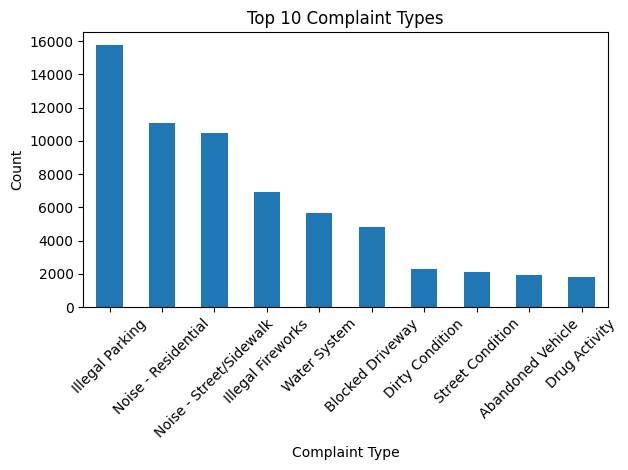

In [ ]:
# Bar chart showing the 10 most frequent complaint types

df['complaint_type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

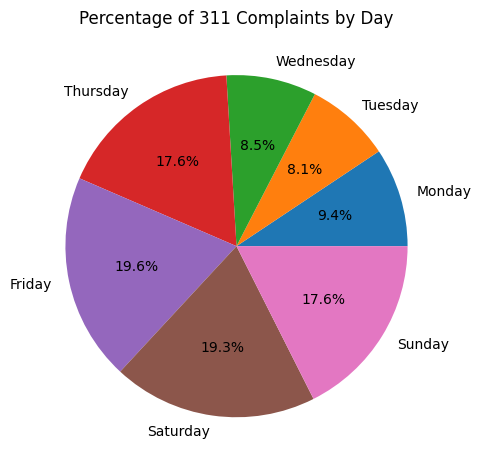

In [ ]:
# Pie chart showing the percentage of complaint by day of week

df['day_of_week'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title("Percentage of 311 Complaints by Day")
plt.tight_layout()
plt.show()

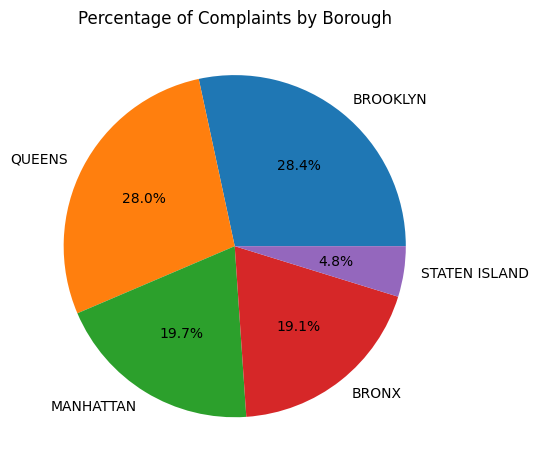

In [ ]:
# Pie chart showing the percentage of complaints by Borough

df['borough'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
plt.title("Percentage of Complaints by Borough")
plt.tight_layout()
plt.show()